In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import struct
import subprocess
import sys

In [89]:
main_dir = "/Users/matteo/Documents/GitHub/SpatialAQP"
test_dir = "test/index_query"

In [90]:
def generate_records(nrec, minval, maxval):
    rec = []
    for i in range(0, nrec):
        x = random.uniform(minval, maxval)
        y = random.uniform(minval, maxval)
        rec.append((x,y))
    return rec

In [91]:
def write_records(filename, rec):
    f = open(filename, 'wb')
    for r in rec:
        f.write(struct.pack('>dd', r[0], r[1]))
    f.close()

In [92]:
def generate_fraction(nrec, S, Q, f):
    rec = []
    # compute the fraction of matching records
    qrec = int(round(f * nrec))
    # generate the matching records
    for i in range(0, qrec):
        x = random.uniform(Q[0], Q[2])
        y = random.uniform(Q[1], Q[3])
        rec.append((x,y))
    # now generate the non matching records
    i = 0
    while (i < nrec - qrec):
        x = random.uniform(S[0], S[2])
        y = random.uniform(S[1], S[3])
        # try to change the middle or to and
        if ((not (Q[0] <= x and x <= Q[2])) or (not (Q[1] <= y and y <= Q[3]))):
            rec.append((x,y))
            i += 1
    random.shuffle(rec)
    return rec

In [93]:
def compute_fraction(rec, Q):
    count = 0
    for r in rec:
        x = r[0]
        y = r[1]
        if (Q[0] <= x and x <= Q[2] and Q[1] <= y and y <= Q[3]):
            count += 1
    return (count / len(rec))

In [101]:
# Generate the test cases.
m = 100000
Q = (0, 0, 100, 100)
S = (-1000, -1000, 1000, 1000)
frac = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

os.chdir('{}/{}'.format(main_dir, test_dir))

for f in frac:
    fp = int(f * 100)
    print('Generating m={} records with f={}%...'.format(m, fp))
    filename = 'records_{}_{}.bin'.format(m, fp)
    rec = generate_fraction(m, S, Q, f)
    write_records(filename, rec)

Generating m=100000 records with f=10%...
Generating m=100000 records with f=20%...
Generating m=100000 records with f=30%...
Generating m=100000 records with f=40%...
Generating m=100000 records with f=50%...
Generating m=100000 records with f=60%...
Generating m=100000 records with f=70%...
Generating m=100000 records with f=80%...
Generating m=100000 records with f=90%...


In [104]:
# Test the implementation.

ntrials = 5
m = 100000
c = 100
Q = (0, 0, 100, 100)
S = (-1000, -1000, 1000, 1000)
frac = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

os.chdir(main_dir)

for f in frac:
    fp = int(f * 100)
    print('Testing m={} records with f={}%...'.format(m, fp))
    input_file = "{}/records_{}_{}.bin".format(out_dir, m, fp)
    for i in range(0, ntrials):
        p = subprocess.run(["java", "TestQuery", input_file, 
            str(c), str(Q[0]), str(Q[1]), str(Q[2]), str(Q[3])], 
            capture_output=True)
        lines = p.stdout.decode('utf-8').splitlines()
        print(lines[5])

Testing m=100000 records with f=10%...
Matching records: 20000
Matching records: 20000
Matching records: 20000
Matching records: 20000
Matching records: 20000
Testing m=100000 records with f=20%...
Matching records: 30000
Matching records: 30000
Matching records: 30000
Matching records: 30000
Matching records: 30000
Testing m=100000 records with f=30%...
Matching records: 40000
Matching records: 40000
Matching records: 40000
Matching records: 40000
Matching records: 40000
Testing m=100000 records with f=40%...
Matching records: 50000
Matching records: 50000
Matching records: 50000
Matching records: 50000
Matching records: 50000
Testing m=100000 records with f=50%...
Matching records: 60000
Matching records: 60000
Matching records: 60000
Matching records: 60000
Matching records: 60000
Testing m=100000 records with f=60%...
Matching records: 70000
Matching records: 70000
Matching records: 70000
Matching records: 70000
Matching records: 70000
Testing m=100000 records with f=70%...
Matchin

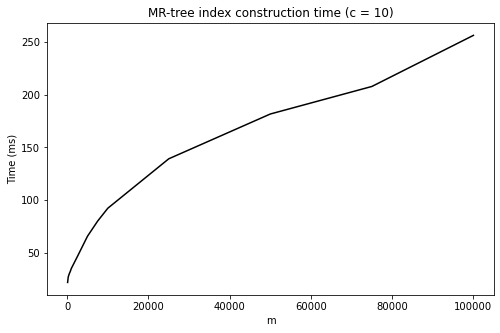

In [43]:
plt.figure(figsize=(8, 5))
plt.title("MR-tree index construction time (c = 10)")
#plt.plot(res['n'], res['mat_time'], color='gray', label='Matlab')
plt.plot(df1['n'], df1['time'], color='black')
plt.ylabel("Time (ms)")
plt.xlabel("m")
#plt.plot([x for x in range(100, 100000)], [x*np.log(x) for x in range(100, 100000)], color='black', linestyle='--')
#plt.legend()
plt.savefig("test_construction.png", dpi=170, format='png', bbox_inches='tight')

In [41]:
#res.to_csv('test_n_full.csv', header=True, index=False)